In [1]:
%pylab nbagg
%load_ext autoreload

%autoreload 2

Populating the interactive namespace from numpy and matplotlib


### Now what would fastCat think of this?

#### We can loop through this

This runs off of a modified xpecgen that returns only the doses and 

In [384]:
import sys
import os
import tigre
from scipy.signal import fftconvolve

sys.path.insert(0,'../xpecgen')

import xpecgen as xg

dose = 1

# phan_map_hard =  ['air','water','Spongiosa_Bone_ICRP','G4_BONE_COMPACT_ICRU',
#              'G4_BONE_CORTICAL_ICRP','C4_Vertebra_ICRP','D6_Vertebra_ICRP','G4_B-100_BONE']

phan_map_hard =  ['air','water','water','water',
             'water','water','water','water']

spectrum_files = ['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25']

dets = ['CWO']#,'CuGOS_lowres']

phan_maps = [phan_map_hard]#,phan_map_soft]

angles = np.linspace(0,2*np.pi,90)

res = []

original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])


angles = np.linspace(0,2*pi,360)

geo = 'catphan_low_contrast_512'

phantom = xg.Catphan_515(os.path.join(xg.data_path,f'phantoms/{geo}.npy'))

for phan_map in phan_maps:
    for spectrum_file in spectrum_files:
        for det in dets:
            s = xg.Spectrum()

            energies = []
            fluence = []

            with open(os.path.join(xg.data_path, "MV_spectra", f'{spectrum_file}.txt')) as f:
                for line in f:
                    energies.append(float(line.split()[0]))
                    fluence.append(float(line.split()[1]))
            
            # Check if MV

            s.x = np.array(energies)*1000  # to keV
            s.y = np.array(fluence)

            spectrum = xg.Spectrum()

            spectrum.x = energies
            spectrum.y = fluence

            dump_files = os.path.join(
                xg.data_path, "Detectors", det, '*phsp.npy')
            energy_deposition_file = os.path.join(
                xg.data_path, "Detectors", det, 'EnergyDeposition.npy')

            kernel, kernels = xg.get_kernel(
                                    s, dump_files, energy_deposition_file)

            energy_deposition_file = os.path.join(
                xg.data_path, "Detectors", det, 'EnergyDeposition.npy')
            energies = s.x
            fluence = s.y
            deposition_efficiency_file = energy_deposition_file

            noise = xg.update_fluence(spectrum_file,dose)

            res.append(xg.return_projs(phantom.phantom,kernel,
                                       energies,fluence,angles,phantom.geomet,
                                       deposition_efficiency_file=deposition_efficiency_file
                                       ,phantom_mapping = phan_map,
                                       scaling=noise,
                                      dose=dose))

#             img_xg = tigre.algorithms.FDK(
#                 np.transpose(np.array(projs_xg[0]),[0,2,1]), phantom.geomet,angles)

#             res.append([[phan_map,spectrum_file,det],phantom.analyse_515(img_xg[5])])

(17,) (17,)
0.0006164371355334828
(17,) (17,)
0.003986048237744313


KeyboardInterrupt: 

In [146]:
# np.save('doses_corresponding_to_energies_6',res[0][0])

## Failed attempt

In [147]:
mu_en=[
1.00000E-03,4.078E+03,4.065E+03,
1.50000E-03,1.376E+03,1.372E+03,
2.00000E-03,6.173E+02,6.152E+02,
3.00000E-03,1.929E+02,1.917E+02,
4.00000E-03,8.278E+01,8.191E+01,
5.00000E-03,4.258E+01,4.188E+01,
6.00000E-03,2.464E+01,2.405E+01,
8.00000E-03,1.037E+01,9.915E+00,
1.00000E-02,5.329E+00,4.944E+00,
1.50000E-02,1.673E+00,1.374E+00,
2.00000E-02,8.096E-01,5.503E-01,
3.00000E-02,3.756E-01,1.557E-01,
4.00000E-02,2.683E-01,6.947E-02,
5.00000E-02,2.269E-01,4.223E-02,
6.00000E-02,2.059E-01,3.190E-02,
8.00000E-02,1.837E-01,2.597E-02,
1.00000E-01,1.707E-01,2.546E-02,
1.50000E-01,1.505E-01,2.764E-02,
2.00000E-01,1.370E-01,2.967E-02,
3.00000E-01,1.186E-01,3.192E-02,
4.00000E-01,1.061E-01,3.279E-02,
5.00000E-01,9.687E-02,3.299E-02,
6.00000E-01,8.956E-02,3.284E-02,
8.00000E-01,7.865E-02,3.206E-02,
1.00000E+00,7.072E-02,3.103E-02,
1.25000E+00,6.323E-02,2.965E-02,
1.50000E+00,5.754E-02,2.833E-02,
2.00000E+00,4.942E-02,2.608E-02,
3.00000E+00,3.969E-02,2.281E-02,
4.00000E+00,3.403E-02,2.066E-02,
5.00000E+00,3.031E-02,1.915E-02,
6.00000E+00,2.770E-02,1.806E-02,
8.00000E+00,2.429E-02,1.658E-02,
1.00000E+01,2.219E-02,1.566E-02,
1.50000E+01,1.941E-02,1.441E-02,
2.00000E+01,1.813E-02,1.382E-02]

mu_energies = mu_en[::3]
mu_en_vals = mu_en[2::3]

<IPython.core.display.Javascript object>


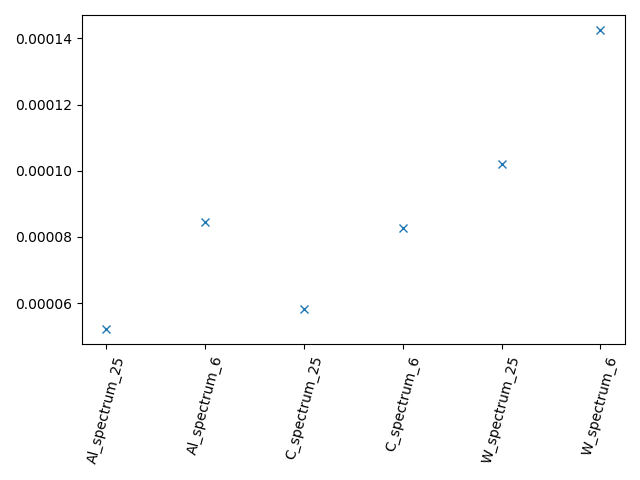

Al_spectrum_25
Al_spectrum_6
6 Al_spectrum_6
C_spectrum_25
C_spectrum_6
6 C_spectrum_6
W_spectrum_25
W_spectrum_6
6 W_spectrum_6


In [253]:
spectrum_files = sorted(['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25'])

plt.figure()

# doses = res[0][0]
doses_fc = []

for jj,spectrum_file in enumerate(spectrum_files):
    
    print(spectrum_file)
    energies = []
    fluence = []

    with open(os.path.join(xg.data_path, "MV_spectra", f'{spectrum_file}.txt')) as f:
        for line in f:
            energies.append(float(line.split()[0]))
            fluence.append(float(line.split()[1]))

    # These are what I used in the Monte Carlo
    original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])

#     mu_en_water = np.array([0.1557, 0.06947,0.04223,0.03190,0.03800,0.02597,0.02554, 0.02546,0.03192,0.03299,0.03244,0.03150,0.03103,0.02608,0.02066,0.01806])

    # Loading the file from the monte carlo
    deposition_summed = np.load(deposition_efficiency_file,allow_pickle=True)

    # This is a scaling factor that I found to work to convert energy deposition to photon probability eta
    deposition_summed = deposition_summed[0]/(original_energies_keV*355)


    # Binning to get the fluence per energy
    large_energies = np.linspace(0,6000,6001)/1000 #keV
    fluence_large = np.interp(large_energies,np.array(energies), fluence)

    fluence_small = np.zeros(len(original_energies_keV))
    
    mu_en_f = xg.log_interp_1d(mu_energies,mu_en_vals)
    
    mu_en_water = [mu_en_f(energy) for energy in energies]

#     # Still binning
#     for ii, val in enumerate(large_energies):

#         index = np.argmin(np.abs(original_energies_keV-val*1000))
#         fluence_small[index] += fluence_large[ii] 

#     # Normalize
#     fluence_small /= np.sum(fluence_small)

    if np.max(energies) > 3:
        
        doses = np.load('doses_corresponding_to_energies_6.npy')
        print('6',spectrum_file)
    else:
        doses = np.load('doses_corresponding_to_energies_25.npy')

    fluence_small = fluence/np.sum(fluence)

    # Sum over the image dimesions to get the energy intensity and multiply by fluence
    dose_divided_by_initial_intensity = doses@(fluence_small*mu_en_water*0.997)
    
    #plt.plot(jj,doses@(fluence_small*mu_en_water),'x')

    # Mass of the phantom there is a times 4 since the detector is 1/4 the size 1000 for mg
    dose_in_mgrays = dose_divided_by_initial_intensity*1.6021766e-13/2.0106*4*1000
    # Scale by the amount of photons hitting the detector
    
    doses_fc.append(dose_in_mgrays)

plt.plot(doses_fc,'x')    
plt.xticks(ticks=range(len(spectrum_files)),labels=spectrum_files,rotation=75)
plt.tight_layout()

## Working attempt

<IPython.core.display.Javascript object>


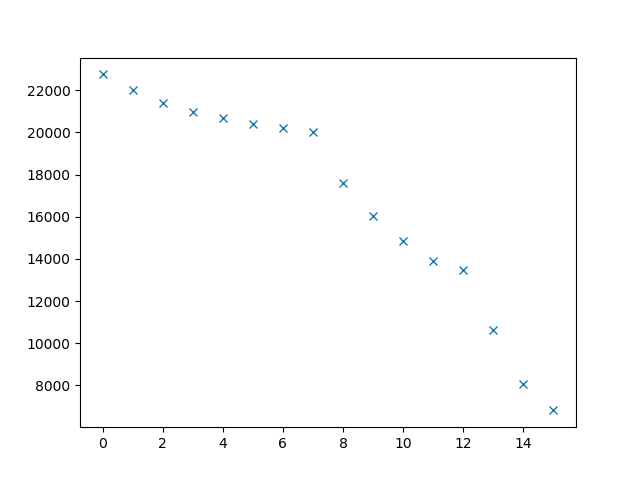

<IPython.core.display.Javascript object>


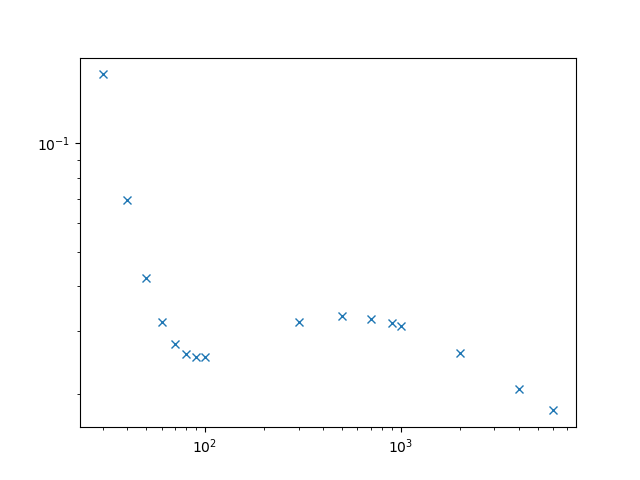

In [331]:
plt.figure()
plt.plot(res[0][0]/original_energies_keV,'x')
plt.figure()
plt.loglog(original_energies_keV,mu_en_water,'x')

In [352]:
mu_en_f = xg.log_interp_1d(mu_energies,mu_en[1::3],'cubic')

mu_water = [mu_en_f(energy) for energy in original_energies_keV/1000]

In [353]:
np.round(mu_water,6)

array([0.3756  , 0.2683  , 0.2269  , 0.2059  , 0.19289 , 0.1837  ,
       0.176564, 0.1707  , 0.1186  , 0.09687 , 0.083614, 0.074411,
       0.07072 , 0.04942 , 0.03403 , 0.0277  ])

<IPython.core.display.Javascript object>


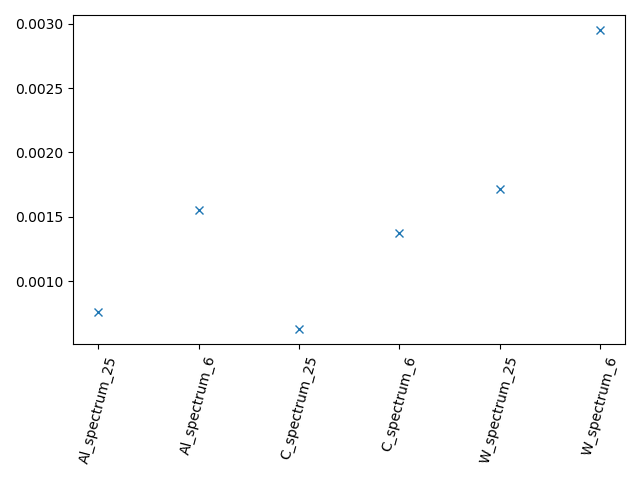

Al_spectrum_25
Al_spectrum_6
C_spectrum_25
C_spectrum_6
W_spectrum_25
W_spectrum_6


In [385]:
spectrum_files = sorted(['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25'])

plt.figure()

doses = res[0][0]
doses_fc = []

for jj,spectrum_file in enumerate(spectrum_files):
    
    print(spectrum_file)
    energies = []
    fluence = []

    with open(os.path.join(xg.data_path, "MV_spectra", f'{spectrum_file}.txt')) as f:
        for line in f:
            energies.append(float(line.split()[0]))
            fluence.append(float(line.split()[1]))

    # These are what I used in the Monte Carlo
    original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])

    mu_en_water = array([0.1557  , 0.06947 , 0.04223 , 0.0319  , 0.027678, 0.02597 ,
       0.025434, 0.02546 , 0.03192 , 0.03299 , 0.032501, 0.031562,
       0.03103 , 0.02608 , 0.02066 , 0.01806 ])
    
    # Loading the file from the monte carlo
    deposition_summed = np.load(deposition_efficiency_file,allow_pickle=True)

    # This is a scaling factor that I found to work to convert energy deposition to photon probability eta
    deposition_summed = deposition_summed[0]/(original_energies_keV*355)


    # Binning to get the fluence per energy
    large_energies = np.linspace(0,6000,3001)/1000 #keV
    fluence_large = np.interp(large_energies,np.array(energies), fluence)

    fluence_small = np.zeros(len(original_energies_keV))

    # Still binning
    for ii, val in enumerate(large_energies):

        index = np.argmin(np.abs(original_energies_keV-val*1000))
        fluence_small[index] += fluence_large[ii] 

    # Normalize
    fluence_small /= np.sum(fluence_small)

    # Sum over the image dimesions to get the energy intensity and multiply by fluence
    dose_divided_by_initial_intensity = doses@(fluence_small*np.exp(-mu_en_water*0.997))
    
    #plt.plot(jj,doses@(fluence_small*mu_en_water),'x')

    # Mass of the phantom there is a times 4 since the detector is 1/4 the size 1000 for mg
    dose_in_mgrays = dose_divided_by_initial_intensity*1.6021766e-13/2.0106*4*1000
    # Scale by the amount of photons hitting the detector
    
    doses_fc.append(dose_in_mgrays)

plt.plot(doses_fc,'x')    
plt.xticks(ticks=range(len(spectrum_files)),labels=spectrum_files,rotation=75)
plt.tight_layout()

In [386]:
doses = np.array([
1.613708349168519e-07,
1.313530049174005e-07,
6.200432949299284e-07,
3.304057543118688e-07,
2.999242099122057e-07,
3.515523019359534e-07,

])
names = np.array([
'Dose_Al_spectrum_25'  ,
'Dose_C_spectrum_25'  ,
'Dose_W_spectrum_6',
'Dose_Al_spectrum_6'  , 
'Dose_C_spectrum_6',
'Dose_W_spectrum_25'])

indeces = np.argsort(names)


names = names[indeces]
doses = doses[indeces]

indeces = np.argsort(doses)

names = names[indeces]
doses = doses[indeces]


<IPython.core.display.Javascript object>


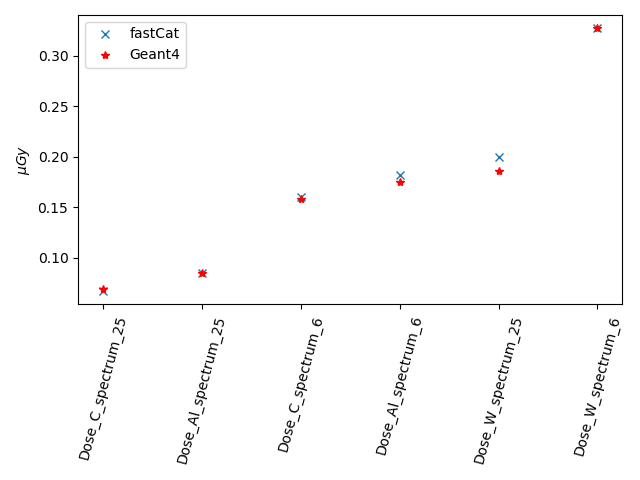

In [393]:
import pandas as pd

d_norm = doses/sum(doses)

doses_fc2 = np.array(doses_fc)
doses_fc2 = (doses_fc2[indeces]-np.min(doses_fc2))
doses_fc2 = doses_fc2/np.max(doses_fc2)*np.max(d_norm)
doses_fc2 += np.min(d_norm)

# doses_fc2 = np.delete(doses_fc2,4)
# d_norm = np.delete(d_norm,4)

dat = pd.DataFrame(d_norm,index=names)#np.delete(names,4))


plt.figure()
plt.plot(doses_fc2*np.exp(-0.48459178*doses_fc2),'x')
plt.plot(dat,'r*')
# plt.plot(doses_fc/sum(doses_fc),'x')
plt.xticks(rotation=75)
plt.ylabel('$\mu Gy$')
plt.legend(['fastCat','Geant4'])
plt.tight_layout()

In [394]:
plt.savefig('Dose Comparison Better')

In [345]:
from scipy.optimize import minimize

In [391]:
minimize(min_fun,0.48449178,method='COBYLA'  )

     fun: 0.047026771627955335
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 24
  status: 1
 success: True
       x: array(0.83282459)

In [390]:
def min_fun(x):
    
    return np.sum(np.abs((doses_fc2)*np.exp(-x*doses_fc2)-d_norm))

In [108]:
x = 5

np.sum(np.abs(np.array(doses_fc)**x-np.array(doses)/np.sum(doses)))

1.0

In [109]:
min_fun(1.23)

0.7929858306156738

<IPython.core.display.Javascript object>


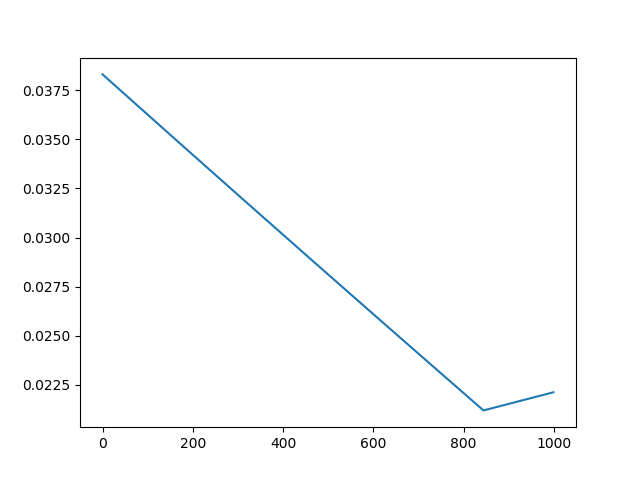

In [350]:
plt.figure()
plt.plot([min_fun(ii) for ii in np.linspace(0.4,0.5,1000)])

In [111]:
np.linspace(0.1,10,100)[27]

2.8000000000000003